In [33]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

In [34]:
df = pd.read_csv("Waiting_for_groupby.csv")

In [35]:
df

,END_DATE,NAME,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,...,2024-12-17 00:00:00,2024-12-18 00:00:00,2024-12-19 00:00:00,2024-12-20 00:00:00,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00,2024-12-30 00:00:00
0,2021-01-29,S50F21C1000,4.9,11.6,7.6,10.5,17.4,13.9,12.9,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-29,S50F21C1025,2.5,6.6,4.0,5.7,10.1,7.4,6.6,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-29,S50F21C1050,1.1,3.5,2.0,2.9,5.5,3.6,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-29,S50F21C1075,NaN,NaN,NaN,NaN,NaN,1.6,1.3,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-29,S50F21C650,272.6,302.4,289.0,304.0,326.2,323.8,324.5,329.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2025-06-30,S50M25P875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,19.5
1410,2025-06-30,S50M25P900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.7,30.0
1411,2025-06-30,S50M25P925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.5,45.1
1412,2025-06-30,S50M25P950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,62.1


In [36]:
se = pd.read_csv("SET 50 Historical Data (5).csv")

In [37]:
se

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2024,906.23,910.62,915.79,905.96,807.32M,-0.29%
1,12/27/2024,908.90,906.94,916.00,904.10,729.34M,0.27%
2,12/26/2024,906.41,906.77,909.57,903.59,757.57M,-0.08%
3,12/25/2024,907.17,907.45,910.27,904.22,1.05B,0.30%
4,12/24/2024,904.44,902.36,906.79,900.32,779.47M,0.50%
...,...,...,...,...,...,...,...
964,01/08/2021,977.59,965.70,977.59,964.91,3.00B,2.32%
965,01/07/2021,955.39,952.69,959.29,946.05,4.56B,1.59%
966,01/06/2021,940.41,951.94,957.42,935.88,3.41B,-1.42%
967,01/05/2021,953.99,923.20,953.99,921.51,2.93B,3.21%


In [38]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%Y-%m-%d')
se['Date'] = pd.to_datetime(se['Date'], format='%m/%d/%Y')

end_date_dict = df.groupby('END_DATE')['NAME'].unique().apply(list).to_dict()


In [39]:
# Loop และสร้างตัวแปร df_1, df_2, ..., df_54
for i, (end_date, sub_df) in enumerate(df.groupby('END_DATE'), start=1):
    globals()[f"df_{i}"] = sub_df.reset_index(drop=True)

In [40]:
df_1

,END_DATE,NAME,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,...,2024-12-17 00:00:00,2024-12-18 00:00:00,2024-12-19 00:00:00,2024-12-20 00:00:00,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00,2024-12-30 00:00:00
0,2021-01-29,S50F21C1000,4.9,11.6,7.6,10.5,17.4,13.9,12.9,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-29,S50F21C1025,2.5,6.6,4.0,5.7,10.1,7.4,6.6,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-29,S50F21C1050,1.1,3.5,2.0,2.9,5.5,3.6,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-29,S50F21C1075,NaN,NaN,NaN,NaN,NaN,1.6,1.3,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-29,S50F21C650,272.6,302.4,289.0,304.0,326.2,323.8,324.5,329.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-01-29,S50F21C675,247.6,277.4,264.0,279.0,301.2,298.8,299.5,304.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-01-29,S50F21C700,222.6,252.4,239.0,254.0,276.2,273.8,274.5,279.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-01-29,S50F21C725,197.7,227.4,214.0,229.0,251.2,248.8,249.5,254.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-01-29,S50F21C750,172.7,202.4,189.0,204.0,226.2,223.8,224.5,229.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-01-29,S50F21C775,147.8,177.5,164.1,179.0,201.3,198.8,199.5,204.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
for i in range(1, 55):
    df = globals()[f'df_{i}']

    # 1. Drop columns that are entirely NaN BEFORE melt
    df = df.dropna(axis=1, how='all')

    # 2. Melt: convert wide to long
    df_melted = df.melt(id_vars=['END_DATE', 'NAME'], var_name='Date', value_name='Price')

    # 3. Convert Date to datetime
    df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')

    # 4. Pivot: Date as row index, NAME as column
    df_pivoted = df_melted.pivot(index='Date', columns='NAME', values='Price')

    # 5. Sort for neatness
    df_pivoted = df_pivoted.sort_index().sort_index(axis=1)

    # 6. Save back to globals
    globals()[f'df_{i}'] = df_pivoted


In [42]:
df_1

NAME,S50F21C1000,S50F21C1025,S50F21C1050,S50F21C1075,S50F21C650,S50F21C675,S50F21C700,S50F21C725,S50F21C750,S50F21C775,...,S50F21P750,S50F21P775,S50F21P800,S50F21P825,S50F21P850,S50F21P875,S50F21P900,S50F21P925,S50F21P950,S50F21P975
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,4.90,2.50,1.10,NaN,272.60,247.60,222.60,197.70,172.70,147.80,...,0.10,0.20,0.60,1.80,4.30,9.10,16.90,28.30,43.20,61.40
2021-01-05,11.60,6.60,3.50,NaN,302.40,277.40,252.40,227.40,202.40,177.50,...,0.10,0.10,0.20,0.70,2.00,4.50,9.20,16.60,27.40,41.70
2021-01-06,7.60,4.00,2.00,NaN,289.00,264.00,239.00,214.00,189.00,164.10,...,0.10,0.10,0.30,1.00,2.60,5.90,11.70,20.70,33.40,49.50
2021-01-07,10.50,5.70,2.90,NaN,304.00,279.00,254.00,229.00,204.00,179.00,...,0.10,0.10,0.10,0.50,1.40,3.50,7.60,14.50,24.90,39.00
2021-01-08,17.40,10.10,5.50,NaN,326.20,301.20,276.20,251.20,226.20,201.30,...,0.10,0.10,0.10,0.20,0.60,1.60,4.00,8.40,15.80,26.60
2021-01-11,13.90,7.40,3.60,1.60,323.80,298.80,273.80,248.80,223.80,198.80,...,0.10,0.10,0.10,0.10,0.30,1.10,3.00,7.00,14.10,25.10
2021-01-12,12.90,6.60,3.00,1.30,324.50,299.50,274.50,249.50,224.50,199.50,...,0.10,0.10,0.10,0.10,0.20,0.80,2.40,5.90,12.70,23.40
2021-01-13,13.60,6.80,3.00,1.20,329.80,304.80,279.80,254.80,229.80,204.80,...,0.10,0.10,0.10,0.10,0.10,0.40,1.50,4.30,10.00,19.60
2021-01-14,9.50,4.30,1.70,0.60,320.40,295.40,270.40,245.40,220.40,195.50,...,0.10,0.10,0.10,0.10,0.10,0.50,1.80,5.10,11.80,23.10


In [43]:
def extract_strike(name):
    match = re.search(r'(\d+)$', name)
    return float(match.group(1)) if match else np.nan

In [44]:
for i in range(1, 55):
    name = f'df_{i}'
    if name in globals():
        df = globals()[name].copy()  # สำรองข้อมูล

        # สร้าง mapping: column → strike
        strike_map = {col: extract_strike(col) for col in df.columns}

        # แปลงราคาเป็น strike โดยไม่แตะ NaN
        for col in df.columns:
            strike = strike_map[col]
            df[col] = df[col].apply(lambda x: strike if pd.notna(x) else np.nan)

        # เขียนกลับเข้า globals
        globals()[f'{name}_1'] = df

In [45]:
df_1_1

NAME,S50F21C1000,S50F21C1025,S50F21C1050,S50F21C1075,S50F21C650,S50F21C675,S50F21C700,S50F21C725,S50F21C750,S50F21C775,...,S50F21P750,S50F21P775,S50F21P800,S50F21P825,S50F21P850,S50F21P875,S50F21P900,S50F21P925,S50F21P950,S50F21P975
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1000.0,1025.0,1050.0,NaN,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-01-05,1000.0,1025.0,1050.0,NaN,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-01-06,1000.0,1025.0,1050.0,NaN,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-01-07,1000.0,1025.0,1050.0,NaN,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-01-08,1000.0,1025.0,1050.0,NaN,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-01-11,1000.0,1025.0,1050.0,1075.0,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-01-12,1000.0,1025.0,1050.0,1075.0,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-01-13,1000.0,1025.0,1050.0,1075.0,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-01-14,1000.0,1025.0,1050.0,1075.0,650.0,675.0,700.0,725.0,750.0,775.0,...,750.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0


In [46]:
se['Date'] = pd.to_datetime(se['Date'])  # แปลงเป็น datetime ก่อน
se.set_index('Date', inplace=True)       # ตั้งเป็น index

In [47]:
se['High'] = pd.to_numeric(se['High'], errors='coerce')
se['Price'] = pd.to_numeric(se['Price'], errors='coerce')

se['Diff'] = se['High'] - se['Price']
se['Diff']

Date
2024-12-30     9.56
2024-12-27     7.10
2024-12-26     3.16
2024-12-25     3.10
2024-12-24     2.35
              ...  
2021-01-08     0.00
2021-01-07     3.90
2021-01-06    17.01
2021-01-05     0.00
2021-01-04     0.00
Name: Diff, Length: 969, dtype: float64

In [48]:
for i in range(1, 55):
    strike_df_name = f'df_{i}_1'
    
    if strike_df_name in globals():
        df_strike = globals()[strike_df_name].copy()

        # ให้แน่ใจว่า se['Price'].index เป็น datetime
        common_dates = df_strike.index.intersection(se['Price'].index)
        df_strike = df_strike.loc[common_dates]
        S_series = se['Price'].loc[common_dates]

        # 🔧 แปลง S ให้เป็น float
        S_series = pd.to_numeric(S_series, errors='coerce')

        df_payoff = pd.DataFrame(index=df_strike.index, columns=df_strike.columns)

        for col in df_strike.columns:
            K_series = pd.to_numeric(df_strike[col], errors='coerce')  # 🔧 แปลง K ให้ชัวร์
            option_type = 'C' if 'C' in col else 'P'

            if option_type == 'C':
                df_payoff[col] = S_series - K_series
            else:
                df_payoff[col] = K_series - S_series

        # ใส่ NaN ตรง cell ที่ strike เดิมไม่มีข้อมูล
        df_payoff = df_payoff.where(df_strike.notna())

        globals()[f'df_{i}_2'] = df_payoff


In [49]:
df_1_2

NAME,S50F21C1000,S50F21C1025,S50F21C1050,S50F21C1075,S50F21C650,S50F21C675,S50F21C700,S50F21C725,S50F21C750,S50F21C775,...,S50F21P750,S50F21P775,S50F21P800,S50F21P825,S50F21P850,S50F21P875,S50F21P900,S50F21P925,S50F21P950,S50F21P975
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,-75.64,-100.64,-125.64,NaN,274.36,249.36,224.36,199.36,174.36,149.36,...,-174.36,-149.36,-124.36,-99.36,-74.36,-49.36,-24.36,0.64,25.64,50.64
2021-01-05,-46.01,-71.01,-96.01,NaN,303.99,278.99,253.99,228.99,203.99,178.99,...,-203.99,-178.99,-153.99,-128.99,-103.99,-78.99,-53.99,-28.99,-3.99,21.01
2021-01-06,-59.59,-84.59,-109.59,NaN,290.41,265.41,240.41,215.41,190.41,165.41,...,-190.41,-165.41,-140.41,-115.41,-90.41,-65.41,-40.41,-15.41,9.59,34.59
2021-01-07,-44.61,-69.61,-94.61,NaN,305.39,280.39,255.39,230.39,205.39,180.39,...,-205.39,-180.39,-155.39,-130.39,-105.39,-80.39,-55.39,-30.39,-5.39,19.61
2021-01-08,-22.41,-47.41,-72.41,NaN,327.59,302.59,277.59,252.59,227.59,202.59,...,-227.59,-202.59,-177.59,-152.59,-127.59,-102.59,-77.59,-52.59,-27.59,-2.59
2021-01-11,-25.09,-50.09,-75.09,-100.09,324.91,299.91,274.91,249.91,224.91,199.91,...,-224.91,-199.91,-174.91,-149.91,-124.91,-99.91,-74.91,-49.91,-24.91,0.09
2021-01-12,-24.49,-49.49,-74.49,-99.49,325.51,300.51,275.51,250.51,225.51,200.51,...,-225.51,-200.51,-175.51,-150.51,-125.51,-100.51,-75.51,-50.51,-25.51,-0.51
2021-01-13,-19.25,-44.25,-69.25,-94.25,330.75,305.75,280.75,255.75,230.75,205.75,...,-230.75,-205.75,-180.75,-155.75,-130.75,-105.75,-80.75,-55.75,-30.75,-5.75
2021-01-14,-28.65,-53.65,-78.65,-103.65,321.35,296.35,271.35,246.35,221.35,196.35,...,-221.35,-196.35,-171.35,-146.35,-121.35,-96.35,-71.35,-46.35,-21.35,3.65


In [50]:
all_dates = set()

# 1. รวมวันที่จากทุก df_i_2
for i in range(1, 55):
    df_name = f'df_{i}_2'
    if df_name in globals():
        all_dates.update(globals()[df_name].index)

# 2. สร้าง DataFrame ผลลัพธ์
all_dates = sorted(all_dates)
result_df = pd.DataFrame(index=all_dates, columns=[f'C{i}' for i in range(1, 6)] + [f'P{i}' for i in range(1, 6)])

# 3. วนทุกวัน แล้วหา Top 5 C / P
for date in all_dates:
    all_calls = []
    all_puts = []

    for i in range(1, 55):
        df_name = f'df_{i}_2'
        if df_name in globals():
            df = globals()[df_name]
            if date in df.index:
                row = df.loc[date]

                # แยก C กับ P
                calls = row[[col for col in row.index if 'C' in col]].dropna().values
                puts = row[[col for col in row.index if 'P' in col]].dropna().values

                all_calls.extend(calls)
                all_puts.extend(puts)

    # หาค่า top 5
    top_calls = sorted(all_calls, reverse=True)[:5]
    top_puts = sorted(all_puts, reverse=True)[:5]

    # เติมให้ครบ 5 ช่อง (ถ้ามีน้อยกว่า)
    top_calls += [np.nan] * (5 - len(top_calls))
    top_puts += [np.nan] * (5 - len(top_puts))

    result_df.loc[date, [f'C{i}' for i in range(1, 6)]] = top_calls
    result_df.loc[date, [f'P{i}' for i in range(1, 6)]] = top_puts


In [51]:
result_df

,C1,C2,C3,C4,C5,P1,P2,P3,P4,P5
2021-01-04,274.36,274.36,249.36,249.36,224.36,125.64,125.64,125.64,100.64,100.64
2021-01-05,303.99,303.99,278.99,278.99,253.99,96.01,96.01,96.01,71.01,71.01
2021-01-06,290.41,290.41,265.41,265.41,240.41,109.59,109.59,109.59,109.59,84.59
2021-01-07,305.39,305.39,280.39,280.39,255.39,94.61,94.61,94.61,94.61,69.61
2021-01-08,327.59,327.59,302.59,302.59,277.59,72.41,72.41,72.41,72.41,47.41
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,204.44,179.44,154.44,129.44,129.44,145.56,145.56,145.56,145.56,120.56
2024-12-25,207.17,182.17,157.17,132.17,132.17,142.83,142.83,142.83,142.83,117.83
2024-12-26,206.41,181.41,156.41,131.41,131.41,143.59,143.59,143.59,143.59,118.59
2024-12-27,208.9,183.9,158.9,133.9,133.9,141.1,141.1,141.1,141.1,116.1


In [52]:
result_df = result_df.ffill().infer_objects()

/var/folders/rc/w7r40l35143bxwkzfxdygctc0000gn/T/ipykernel_6233/2271624871.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df = result_df.ffill().infer_objects()


In [53]:
missing = result_df.isna().sum()
print(f"Missing values: {missing}")

Missing values: C1    0
C2    0
C3    0
C4    0
C5    0
P1    0
P2    0
P3    0
P4    0
P5    0
dtype: int64


In [54]:
daily_max_loss = result_df.max(axis=1)  # axis=1 → max across columns per row
len(daily_max_loss)

969

In [55]:
rolling_var_99 = daily_max_loss.rolling(window=60).quantile(0.99)

rolling_es_99 = daily_max_loss.rolling(window=60).apply(
    lambda x: x[x >= x.quantile(0.99)].mean(), raw=False
)


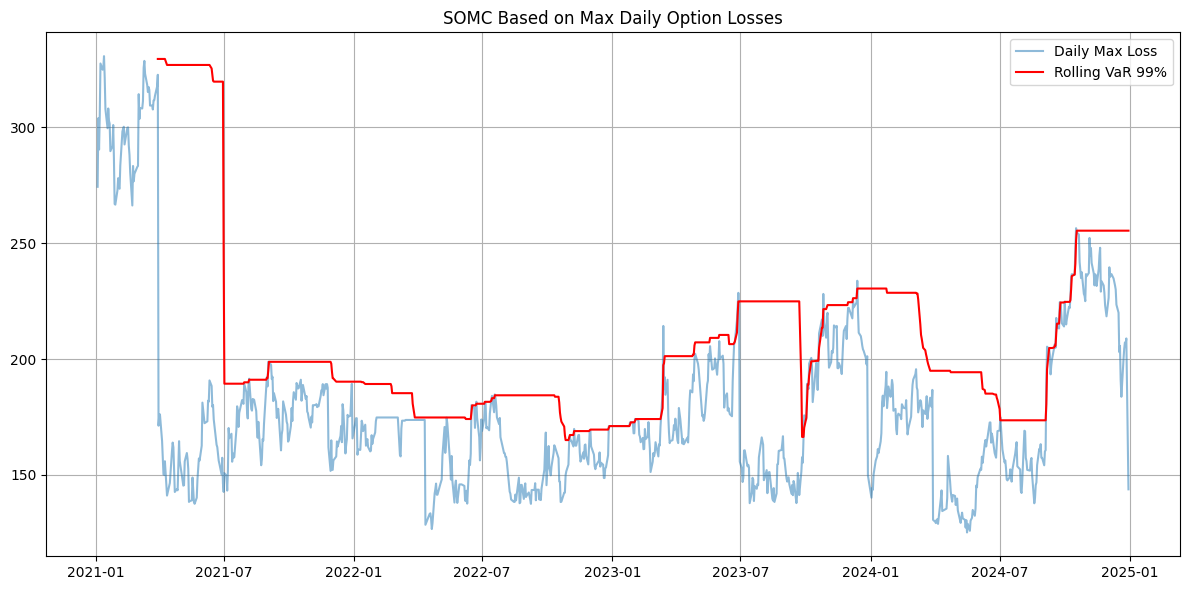

In [56]:
plt.figure(figsize=(12,6))
plt.plot(daily_max_loss, label='Daily Max Loss', alpha=0.5)
plt.plot(rolling_var_99, label='Rolling VaR 99%', color='red')
#plt.plot(rolling_es_99, label='Rolling ES 99%', color='green')
plt.legend()
plt.title("SOMC Based on Max Daily Option Losses")
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
rolling_var_99.describe()

count    910.000000
mean     207.052620
std       38.752912
min      165.030900
25%      183.732900
50%      194.943300
75%      224.904300
max      329.540500
dtype: float64

In [58]:
So = pd.read_excel('Historical Price Short Option Minimum Charge.xlsx')

In [59]:
So['SOMC'] = So['Short Option Minimum Charge  (Baht)']

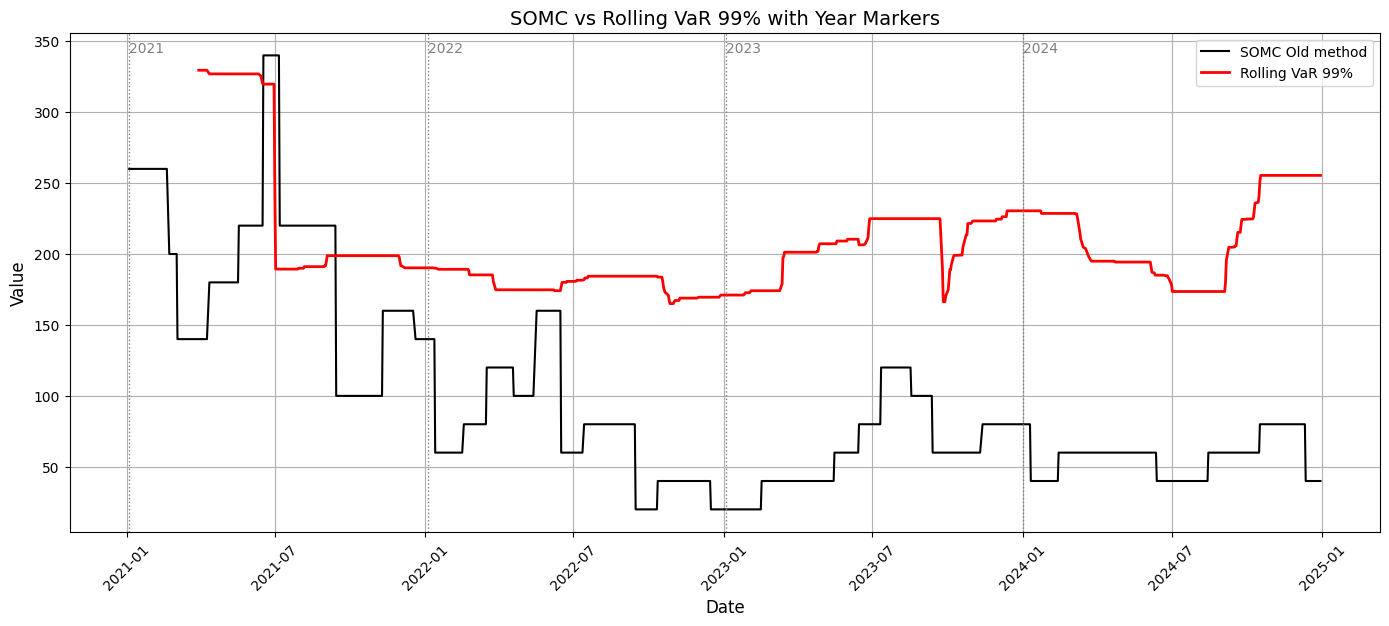

In [60]:
# เตรียมข้อมูล SOMC
somc_series = So[['Date', 'SOMC']].dropna()
somc_series['Date'] = pd.to_datetime(somc_series['Date'])

# เตรียมข้อมูล rolling_var_99 (ต้องมี index เป็น datetime ด้วย)
rolling_var_99 = rolling_var_99.dropna()  # กรอง NaN ออก

# สร้างกราฟ
plt.figure(figsize=(14, 6))
plt.plot(somc_series['Date'], somc_series['SOMC'], label='SOMC Old method', color='black')

# เส้น rolling VaR 99%
plt.plot(rolling_var_99.index, rolling_var_99.values, label='Rolling VaR 99%', color='red', linewidth=2)

# เส้นแบ่งปี
years = somc_series['Date'].dt.year.unique()
for year in years:
    first_day = somc_series[somc_series['Date'].dt.year == year]['Date'].min()
    plt.axvline(x=first_day, color='gray', linestyle=':', linewidth=1)
    plt.text(first_day, somc_series['SOMC'].max(), str(year),
             verticalalignment='bottom', horizontalalignment='left', fontsize=10, color='gray')

# ตกแต่งกราฟ
plt.title("SOMC vs Rolling VaR 99% with Year Markers", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
